## 1. Загружаем файл с данными показов кинопроизведений в кинозалах на территории Российской Федерации: 

In [1]:
# Библиотека для работы с табличными данными
import pandas as pd

In [2]:
# Прочтем файл .csv с помощью библиотеки pandas
df = pd.read_csv('data-5-structure-1.csv')

## 2. Выяснение технических параметров таблицы для дальнейшей работы:

In [3]:
# Возвращает размеры таблицы в виде кортежа из 2 значений: 1 - колисчетсво строк, 2 - количество столбцов
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Название                626 non-null    object 
 1   № ПУ                    615 non-null    object 
 2   Сборы, руб.             626 non-null    float64
 3   Тип                     626 non-null    object 
 4   Возрастное ограничение  626 non-null    object 
dtypes: float64(1), object(4)
memory usage: 24.6+ KB


In [4]:
# Проверить тип данных в столбцах
# В нашем случае везде object, за исключением стоблца "Сборы, руб." - float64, число 64 указывает на разрядность (используется 64 байта для хранения значения в памяти,
# чем меньше разрядность, тем меньший диапазон могут принимать числа и тем меньше тратится памяти на хранение.
df.dtypes

Название                   object
№ ПУ                       object
Сборы, руб.               float64
Тип                        object
Возрастное ограничение     object
dtype: object

In [5]:
# Посмотреть есть ли у нас пустые значения
df.isnull().sum()

Название                   0
№ ПУ                      11
Сборы, руб.                0
Тип                        0
Возрастное ограничение     0
dtype: int64

### Вывод:
* Таблица состоит из 626 строк и 5 столбцов.
* Строка = наименование кинопроизведения.
* Столбцы: 
  - 0 - Название (наименование кинопроизведения)
  - 1 - № ПУ (номер прокатного удостоверения)
  - 2 - Сборы в руб. (сумма кассовых сборов по каждому кинопроизведению в валюте Российский рубль)
  - 3 - Тип (категория кинопроизведения)
  - 4 - Возрастное ограничение
* В таблице имеется 11 пустых значений в столбце "№ ПУ"
* Имеется следующий тип данных:
  * float64 (1) - 1 столбец с дробными численными значениями
  * object (4) - 4 столбца с текстовым значением
* Используется 24,6 KB памяти

## 3. Просмотр первых и последних 10 строк таблицы:

In [6]:
# Посмотреть первые 10 строк 
df.head(10)

,Название,№ ПУ,"Сборы, руб.",Тип,Возрастное ограничение
0,Холоп,111021719,3.073569e+09,художественный,«12+» для детей старше 12 лет
1,Король Лев,124004919 / 124002720,2.635292e+09,анимационный,«6+» для детей старше 6 лет
2,Мстители: Финал,121005519,2.576614e+09,художественный,«16+» для детей старше 16 лет
3,Т-34,111024918,2.271754e+09,художественный,«12+» для детей старше 12 лет
4,Малефисента: Владычица тьмы,121026219,1.911945e+09,художественный,«6+» для детей старше 6 лет
5,Джокер,121027519,1.890368e+09,художественный,«18+» запрещено для детей
6,Холодное сердце II,124009619,1.827245e+09,анимационный,«6+» для детей старше 6 лет
7,Как приручить дракона 3,124000719,1.689541e+09,анимационный,«6+» для детей старше 6 лет
8,Тайная жизнь домашних животных 2,124003519,1.478921e+09,анимационный,«6+» для детей старше 6 лет
9,Аладдин,121011419 / 121009320,1.216636e+09,художественный,«6+» для детей старше 6 лет


In [7]:
# Посмотреть последние 10 строк
df.tail(10)

,Название,№ ПУ,"Сборы, руб.",Тип,Возрастное ограничение
616,Диего Марадона,126003519,38330.0,другой,«16+» для детей старше 16 лет
617,Стреляйте в пианиста,121016119,35413.0,художественный,«16+» для детей старше 16 лет
618,Колесо времени,111003219,34992.0,художественный,«6+» для детей старше 6 лет
619,Земная сторона Луны,211019419,33410.0,художественный,«6+» для детей старше 6 лет
620,Я вам не негр,NaN,33325.0,другой,«18+» запрещено для детей
621,Ведьма Гор,211013019,32000.0,художественный,«16+» для детей старше 16 лет
622,Дядя Саша,211018618,28358.0,художественный,«18+» запрещено для детей
623,Дети футбола,212009319,13200.0,документальный,«0+» для любой зрительской аудитории
624,Время собирать цветы,112025118,7175.0,документальный,«12+» для детей старше 12 лет
625,Счастье - это…Часть 2,111005319,4398.4,художественный,«6+» для детей старше 6 лет


## 4. Рассмотрение соотношения популярности кинопроизведений у зрителей в зависимости от возрастного рейтинга:

### 4.1. Возрастной рейтинг «18+» (запрещено для детей)

In [9]:
# Выбор определенного кол-ва рядов и столбцов
# используется метод loc в [], первый аргумент индекс или селектор, а второй список со столбцами

df.loc[(df['Возрастное ограничение'] == '«18+» запрещено для детей'), ['Название', 'Сборы, руб.']]

,Название,"Сборы, руб."
5,Джокер,1.890368e+09
12,Однажды... в Голливуде,1.121949e+09
14,Оно-2,1.107950e+09
35,Джон Уик 3,4.381166e+08
39,Текст,3.799543e+08
...,...,...
607,Созданный в Бездне - Блуждающие сумерки,7.370000e+04
612,Кровь,5.568500e+04
614,Глазами детей,5.054300e+04
620,Я вам не негр,3.332500e+04


Результат: всего 202 кинопроизведения из 626 кинопроизведений с категорией «18+», что составляет около 32%.

### 4.2. Возрастной рейтинг «16+» (для детей старше 16 лет) / «18+» (запрещено для детей)

In [10]:
# Выбор определенного кол-ва рядов и столбцов
# используется метод loc в [], первый аргумент индекс или селектор, а второй список со столбцами

df.loc[(df['Возрастное ограничение'] == '«16+» для детей старше 16 лет / «18+» запрещено для детей'), ['Название', 'Сборы, руб.']]

,Название,"Сборы, руб."
47,Любовницы,2.914453e+08
239,Выше неба,7.572576e+06
464,Русское краткое. Выпуск 2-6,1.156482e+06


Результат: всего 3 кинопроизведения из 626 кинопроизведений из разряда переходящих категорий («16+» для детей старше 16 лет / «18+» запрещено для детей).

### 4.3. Возрастной рейтинг «16+» (для детей старше 16 лет)

In [11]:
# Выбор определенного кол-ва рядов и столбцов
# используется метод loc в [], первый аргумент индекс или селектор, а второй список со столбцами

df.loc[(df['Возрастное ограничение'] == '«16+» для детей старше 16 лет'), ['Название', 'Сборы, руб.']]

,Название,"Сборы, руб."
2,Мстители: Финал,2.576614e+09
11,Капитан Марвел,1.144426e+09
18,Алита: Боевой ангел,7.578647e+08
21,Звёздные войны: Скайуокер. Восход,6.712179e+08
22,Ford против Ferrari,6.524553e+08
...,...,...
610,Into_нация большой Одессы,6.215600e+04
611,Балет сегодня,5.982900e+04
616,Диего Марадона,3.833000e+04
617,Стреляйте в пианиста,3.541300e+04


Результат: всего 207 кинопроизведения из 626 кинопроизведений с категорией «16+», что составляет около 33%.

### 4.4. Возрастной рейтинг «12+» (для детей старше 12 лет) / «16+» (для детей старше 16 лет)

In [12]:
# Выбор определенного кол-ва рядов и столбцов
# используется метод loc в [], первый аргумент индекс или селектор, а второй список со столбцами

df.loc[(df['Возрастное ограничение'] == '«12+» для детей старше 12 лет / «16+» для детей старше 16 лет'), ['Название', 'Сборы, руб.']]

,Название,"Сборы, руб."
502,"Кинопоэзия: Серебряный век, Друзья, прекрасен ...",807846.51


Результат: всего 1 кинопроизведение из 626 кинопроизведений из разряда переходящих категорий («12+» для детей старше 12 лет / «16+» для детей старше 16 лет).

### 4.5. Возрастной рейтинг «12+» (для детей старше 12 лет)

In [13]:
# Выбор определенного кол-ва рядов и столбцов
# используется метод loc в [], первый аргумент индекс или селектор, а второй список со столбцами

df.loc[(df['Возрастное ограничение'] == '«12+» для детей старше 12 лет'), ['Название', 'Сборы, руб.']]

,Название,"Сборы, руб."
0,Холоп,3.073569e+09
3,Т-34,2.271754e+09
10,Человек-Паук: Вдали от дома,1.203696e+09
13,Джуманджи: Новый уровень,1.120026e+09
15,Форсаж: Хоббс и Шоу,1.065210e+09
...,...,...
604,Одиссея Петра,7.871850e+04
605,Весури,7.585000e+04
613,Хочется тишины,5.310000e+04
615,Доживем до каникул?..,4.122500e+04


Результат: всего 113 кинопроизведений из 626 кинопроизведений с категорией «12+», что составляет около 18%.

### 4.6. Возрастной рейтинг «6+» (для детей старше 6 лет)

In [14]:
# Выбор определенного кол-ва рядов и столбцов
# используется метод loc в [], первый аргумент индекс или селектор, а второй список со столбцами

df.loc[(df['Возрастное ограничение'] == '«6+» для детей старше 6 лет'), ['Название', 'Сборы, руб.']]

,Название,"Сборы, руб."
1,Король Лев,2.635292e+09
4,Малефисента: Владычица тьмы,1.911945e+09
6,Холодное сердце II,1.827245e+09
7,Как приручить дракона 3,1.689541e+09
8,Тайная жизнь домашних животных 2,1.478921e+09
...,...,...
571,Слон и Бабочка,1.879735e+05
583,44 котёнка,1.369580e+05
618,Колесо времени,3.499200e+04
619,Земная сторона Луны,3.341000e+04


Результат: всего 89 кинопроизведений из 626 кинопроизведений с категорией «6+», что составляет около 14%.

### 4.7. Возрастной рейтинг «0+» (для любой зрительской аудитории)

In [15]:
# Выбор определенного кол-ва рядов и столбцов
# используется метод loc в [], первый аргумент индекс или селектор, а второй список со столбцами

df.loc[(df['Возрастное ограничение'] == '«0+» для любой зрительской аудитории'), ['Название', 'Сборы, руб.']]

,Название,"Сборы, руб."
69,Мульт в кино. Выпуск № 88-109,1.523156e+08
84,Щенячий патруль (8 выпусков),1.161371e+08
205,Букашки 2,1.377963e+07
310,Робокар Поли: Приключение в Брумтауне,3.885434e+06
316,Бегство рогатых викингов,3.574034e+06
402,Маша и Медведь (Летние каникулы с Машей и Медв...,1.737512e+06
532,На волне (режиссерская версия),4.949640e+05
603,Антон Чехов и Исаак Левитан: двойной портрет в...,8.100000e+04
609,Ледники Чёрного Июса,6.620000e+04
623,Дети футбола,1.320000e+04


Результат: всего 10 кинопроизведений из 626 кинопроизведений с категорией «0+», что составляет около 2%.

### Вывод: 
Кинопроизведения с рейтингом «16+» (около 32%) и «18+» (около 33%) оказались самыми востребованными у зрителей, что в совокупности составляет около 65% от общего числа кинопроката. Кинопроизведения с рейтингами «6+» (около 14%) и «12+» (около 18%) вместе не превышают 32%. Самыми невостребованными кинопроизведениями стали с рейтингом «0+» - всего около 2%. Также имеются двойные рейтинги кинопроизведений: «16+» для детей старше 16 лет / «18+» запрещено для детей - всего 3 кинопроизведения, «12+» для детей старше 12 лет / «16+» для детей старше 16 лет - всего 1 кинопроизведение.

## 5. Рассмотрение соотношения популярности категорий кинопроизведений у зрителей:

### 5.1. Кинопроизведения категории «Документальный»

In [16]:
# Выбор определенного кол-ва рядов и столбцов
# используется метод loc в [], первый аргумент индекс или селектор, а второй список со столбцами

df.loc[(df['Тип'] == 'документальный'), ['Название', 'Сборы, руб.']]

,Название,"Сборы, руб."
174,BEEF: Русский хип-хоп,23420274.32
344,Raving Riot: Рейв у парламента,2884539.00
388,Сорокин Трип,1973137.00
459,Мозг. Эволюция,1222127.50
476,Годовщина Революции,1003669.00
496,Капитан Немо,876064.00
534,Анатолий Крупнов. Он был…,468553.50
553,Вертинский. Одинокий странник,342509.00
559,Юра музыкант,298060.00
585,Вертолёты,136355.00


Результат: всего 16 кинопроизведений из 626 фильмов с категорией «Документальный», что составляет 3%.

### 5.2. Кинопроизведения категории «Художественный»

In [17]:
# Выбор определенного кол-ва рядов и столбцов
# используется метод loc в [], первый аргумент индекс или селектор, а второй список со столбцами

df.loc[(df['Тип'] == 'художественный'), ['Название', 'Сборы, руб.']]

,Название,"Сборы, руб."
0,Холоп,3.073569e+09
2,Мстители: Финал,2.576614e+09
3,Т-34,2.271754e+09
4,Малефисента: Владычица тьмы,1.911945e+09
5,Джокер,1.890368e+09
...,...,...
618,Колесо времени,3.499200e+04
619,Земная сторона Луны,3.341000e+04
621,Ведьма Гор,3.200000e+04
622,Дядя Саша,2.835800e+04


Результат: всего 463 кинопроизведения из 626 кинопроизведений с категорией «Художественный», что составляет 74%.

### 5.2. Кинопроизведения категории «Научно-популярный»

In [18]:
# Выбор определенного кол-ва рядов и столбцов
# используется метод loc в [], первый аргумент индекс или селектор, а второй список со столбцами

df.loc[(df['Тип'] == 'научно-популярный'), ['Название', 'Сборы, руб.']]

,Название,"Сборы, руб."
335,33 слова о дизайне,3169101.0
364,Великий северный путь,2459667.5
414,Андрей Тарковский. Кино как молитва,1555375.5
492,Тайна Карлоса Кастанеды,891539.5
511,Ярд,749047.5
532,На волне (режиссерская версия),494964.0
552,Пространство музыки,344167.0
609,Ледники Чёрного Июса,66200.0


Результат: всего 8 кинопроизведений из 626 кинопроизведений с категорией «Научно-популярный», что составляет 1%.

### 5.3. Кинопроизведения категории «Анимационный»

In [19]:
# Выбор определенного кол-ва рядов и столбцов
# используется метод loc в [], первый аргумент индекс или селектор, а второй список со столбцами

df.loc[(df['Тип'] == 'анимационный'), ['Название', 'Сборы, руб.']]

,Название,"Сборы, руб."
1,Король Лев,2.635292e+09
6,Холодное сердце II,1.827245e+09
7,Как приручить дракона 3,1.689541e+09
8,Тайная жизнь домашних животных 2,1.478921e+09
17,Семейка Аддамс,7.924510e+08
...,...,...
583,44 котёнка,1.369580e+05
590,SHNIT SHORTS 2019. Анимационная программа,1.286500e+05
597,Разве плохо искать себе пару в подземелье? - С...,9.490000e+04
606,Созданный в Бездне - Рассвет путешествия,7.530000e+04


Результат: всего 78 кинопроизведений из 626 кинопроизведений с категорией «Анимационный», что составляет 12%.

### 5.4. Кинопроизведения категории «Другой»

In [20]:
# Выбор определенного кол-ва рядов и столбцов
# используется метод loc в [], первый аргумент индекс или селектор, а второй список со столбцами

df.loc[(df['Тип'] == 'другой'), ['Название', 'Сборы, руб.']]

,Название,"Сборы, руб."
128,BTS: Открой свою душу. Фильм,49588994.97
213,Lil Peep: Всё для всех,12300474.55
226,Леонардо да Винчи. Неизведанные миры,9319951.95
252,Акварель,6330992.50
253,Микеланджело. Бесконечность,6308384.48
...,...,...
601,Лил Бак: Настоящий лебедь,83285.00
608,Ганнибал,67510.00
611,Балет сегодня,59829.00
616,Диего Марадона,38330.00


Результат: всего 61 кинопроизведение из 626 кинопроизведений с категорией «Другой», что составляет 10%.

### Вывод: 
Самой востребованной категорией кинопроизведений у потребителей стала - «Художественный», что составляет около 74% от общего числа кинопроката. Кинопроизведения категорий «Анимационный» (около 12%) и «Другой» (около 10%) вместе не превышают 22%. Самыми невостребованными категориями кинопроизведений являются «Документальный» - около 3%, и научно-популярный - около 1%.

## 6. Рассмотрение статистики кассовых сборов в кинотеатрах:

In [21]:
# Минимальное значение
df.loc[(df['Сборы, руб.'] == df['Сборы, руб.'].min()), ['Название', 'Сборы, руб.', 'Тип', 'Возрастное ограничение']]

,Название,"Сборы, руб.",Тип,Возрастное ограничение
625,Счастье - это…Часть 2,4398.4,художественный,«6+» для детей старше 6 лет


In [22]:
# Максимальное значение
df.loc[(df['Сборы, руб.'] == df['Сборы, руб.'].max()), ['Название', 'Сборы, руб.', 'Тип', 'Возрастное ограничение']]

,Название,"Сборы, руб.",Тип,Возрастное ограничение
0,Холоп,3.073569e+09,художественный,«12+» для детей старше 12 лет


In [23]:
# Среднее значение
df[['Сборы, руб.']].mean()

Сборы, руб.    9.086532e+07
dtype: float64

In [24]:
# Медианное значение
df[['Сборы, руб.']].median()

Сборы, руб.    3643306.72
dtype: float64

In [25]:
# Нахождение списка кинопродукции с кассовыми сборами менее медианного значения
# Выбор определенного кол-ва рядов и столбцов
# используется метод loc в [], первый аргумент индекс или селектор, а второй список со столбцами
df.loc[(df['Сборы, руб.'] < df['Сборы, руб.'].median()), ['Название', 'Сборы, руб.', 'Тип', 'Возрастное ограничение']]

,Название,"Сборы, руб.",Тип,Возрастное ограничение
313,Новогодний ремонт,3591456.36,художественный,«12+» для детей старше 12 лет
314,Шедевр,3591049.00,художественный,«16+» для детей старше 16 лет
315,Джуди,3586753.00,художественный,«16+» для детей старше 16 лет
316,Бегство рогатых викингов,3574033.76,художественный,«0+» для любой зрительской аудитории
317,По воле божьей,3565967.00,художественный,«18+» запрещено для детей
...,...,...,...,...
621,Ведьма Гор,32000.00,художественный,«16+» для детей старше 16 лет
622,Дядя Саша,28358.00,художественный,«18+» запрещено для детей
623,Дети футбола,13200.00,документальный,«0+» для любой зрительской аудитории
624,Время собирать цветы,7175.00,документальный,«12+» для детей старше 12 лет


## 7. Графическая визуализация кассовых сборов кинопроизведений:

In [26]:
# Библиотека для вычислений линейной алгебры
import numpy as np
# Библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='Сборы, руб.', ylabel='Тип'>

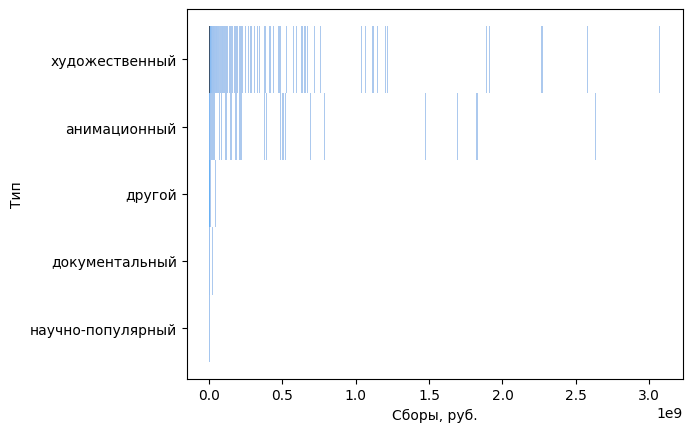

In [30]:
# Изображения точек категорий кинопроизведений по отношению к кассовым сборам. Можно заметить, что динамика собираемости 
# кинопроизведениями (в зависимости о категории) сборов не равномерна - резкое снижение количества категорий по объему собираемости кассовых сборов. 
# Достоточные высокие показатели показывают кинопроизведения категорий "Художественный" и "Анимационный".
sns.histplot(data=df, x='Сборы, руб.', y="Тип")

<AxesSubplot: xlabel='Сборы, руб.', ylabel='Возрастное ограничение'>

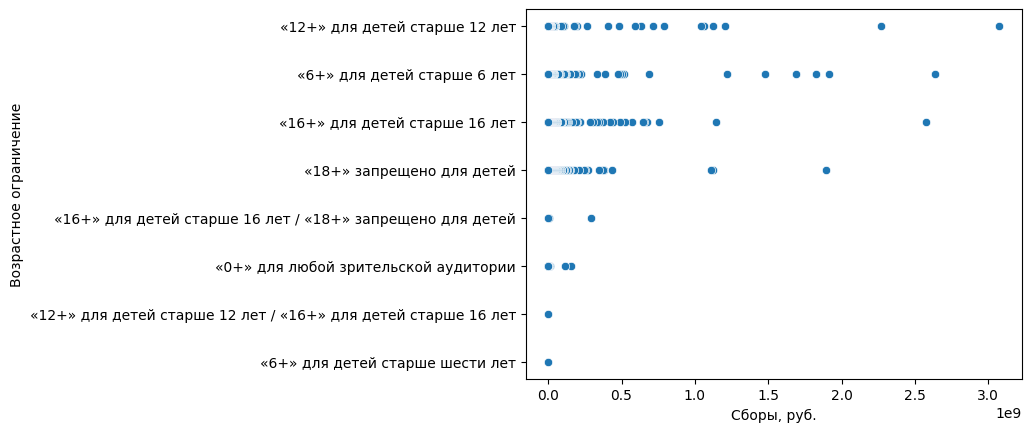

In [37]:
# Изображения точек возрастных ограничений по отношению к кассовым сборам. Можно заметить, что динамика собираемости 
# кинопроизведениями (в зависимости от возрастного рейтинга кинопроизведения) сборов не равномерна - резкое понижение. 
# Достоточные высокие показатели показывают кинопроизведения с возрастными рейтингами "6+", "12+" и "16+".
sns.scatterplot(data=df, x='Сборы, руб.', y='Возрастное ограничение')

## 8. Заключение: 

Представленная в dataset файле (data-5-structure-1.csv) таблица состоит из 626 строк и 5 столбцов, где количество строк приравнивается количеству названий кинопроизведений.

Таблица состоит из следующих столбцов: 
  - 0 - Название (наименование кинопроизведения)
  - 1 - № ПУ (номер прокатного удостоверения)
  - 2 - Сборы в руб. (сумма кассовых сборов по каждому кинопроизведению в валюте Российский рубль)
  - 3 - Тип (категория кинопроизведения)
  - 4 - Возрастное ограничение

В таблице имеется 11 пустых значений, а именно в столбце "№ ПУ"

В таблице представлены 2 типа данных:
  * float64 (1) - 1 столбец с дробными численными значениями
  * object (4) - 4 столбца с текстовым значением
Файл использует 24,6 KB памяти

Анализ данных, представленных в таблице данных, позволяет сделать следующие выводы:
1. Не смотря на то, что крупные сборы собирают кинопроизведения из категории с возрастными рейтингами «6+», «12+» и «16+», однако кинопроизведения с рейтингом «16+» (около 32%) и «18+» (около 33%) оказались самыми востребованными у зрителей, что в совокупности составляет около 65% от общего числа кинопроката. Кинопроизведения с рейтингами «6+» (около 14%) и «12+» (около 18%) вместе не превышают 32%. Самыми невостребованными кинопроизведениями стали с рейтингом «0+» - всего около 2%. Также имеются двойные рейтинги кинопроизведений: «16+» для детей старше 16 лет / «18+» запрещено для детей - всего 3 кинопроизведения, «12+» для детей старше 12 лет / «16+» для детей старше 16 лет - всего 1 кинопроизведение.
   
2. Самой востребованной категорией кинопроизведений у потребителей стала - «Художественный», что составляет около 74% от общего числа кинопроката. Кинопроизведения категорий «Анимационный» (около 12%) и «Другой» (около 10%) вместе не превышают 22%. Самыми невостребованными категориями кинопроизведений являются «Документальный» - около 3%, и научно-популярный - около 1%.
   
3. Разрыв между минимальным размером кассовых сборов (4398.4) и средним (9.086532e+07), так и максимальным (3.073569e+09), очень велик. Согласно расчетов 50% кинопродукции собирает кассовый сбор не превышающий медианное значение кассовых сборов (3643306.72).